# Regression Analysis for Price of OLX Cars


## About Dataset
Explore a comprehensive dataset featuring details of cars available on OLX website. The dataset, sourced directly from OLX Cars Listings, captures real data without any dummy entries.

## Objective for Regression Model Training:

The primary objective of developing a regression model for predicting the resale price of used OLX Cars is to provide an accurate and reliable tool for estimating the market value of vehicles based on various features. This model aims to facilitate informed pricing decisions for both sellers and buyers in the OLX Cars marketplace. Specifically, the regression model aims to define accurate price prediction by developing a model that can accurately predict the resale price of OLX Cars based on relevant features such as make, model, year of manufacture, mileage, fuel type, transmission type, and other significant factors. By achieving these objectives, the regression model aims to enhance the pricing transparency and efficiency in the OLX Cars marketplace, ultimately benefiting both sellers and buyers in making well-informed decisions regarding used car transactions.

## Training Models:

- Linear Regression
- XGBoost
- Random Forest
- Decision Tree

# Environment Preparation

## Import software libraries

In [99]:
import sys                                                  # Read system parameters.
import numpy as np                                          # Work with multi-dimensional arrays.
import pandas as pd                                         # Manipulate and analyze data.
import matplotlib                                           # Create and format charts.
import matplotlib.pyplot as plt
import seaborn as sns                                       # Make charting easier.
import sklearn                                              # Train and evaluate machine learning models.
from sklearn.model_selection import train_test_split, \
                                    learning_curve, \
                                    GridSearchCV
from sklearn.linear_model import LinearRegression, \
                                 ElasticNet
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, \
                            mean_absolute_error, \
                            mean_squared_error
from sklearn.dummy import DummyRegressor
import xgboost                                              # Build gradient boosting models.
from xgboost import XGBRegressor
import pickle                                               # Save Python objects as binary files.
import warnings                                             # Suppress warnings.
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import category_encoders as ce 

# Ensure results are reproducible.
np.random.seed(1)

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sns.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))
print('- XGBoost {}'.format(xgboost.__version__))

Libraries used in this project:
- Python 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
- NumPy 1.23.5
- pandas 1.5.3
- Matplotlib 3.7.0
- Seaborn 0.12.2
- scikit-learn 1.2.2
- XGBoost 2.0.2


# Data Preparation

## Load and preview the data

In [100]:
pd.set_option('display.max_columns', None)
data = pd.read_csv(R"C:\Users\Dell\Downloads\regression\OLX Cars Dataset\OLX_cars_dataset.csv")
data.head(5)

,Ad ID,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features,Images URL's,Car Page
0,1080434207,Changan Alsvin 1.5 Lumiere,Changan,Alsvin,2022,8500,4200000,Petrol,Lahore,Original,Local,Automatic,Used,"DHA Phase 8, Lahore",Changan Alsvin 1.5 Lumiere model 2022 TOTAL GE...,"ABS, Air Bags, Air Conditioning, Alloy Rims, A...",['https://images.olx.com.pk/thumbnails/4153072...,https://www.olx.com.pk/item/changan-alsvin-15-...
1,1080155972,Changan alsvin lumiere 2022 Model,Changan,Alsvin,2022,2200,4100000,Petrol,Lahore,Original,Local,Automatic,Used,"Walton Road, Lahore",Changan Alsvin Fully Automatic 1.5\nunder use ...,"ABS, Air Bags, Air Conditioning, Alloy Rims, A...",['https://images.olx.com.pk/thumbnails/4104300...,https://www.olx.com.pk/item/changan-alsvin-lum...
2,1080646142,chang an Alsvin Lumiere,Changan,Alsvin,2021,17000,3950000,Petrol,Punjab,Original,Local,Automatic,Used,"MM Alam Road, Lahore",changan Alsvin\n17 000 driven\nfull original\n...,"ABS, Air Bags, Air Conditioning, Alloy Rims, C...",['https://images.olx.com.pk/thumbnails/4133439...,https://www.olx.com.pk/item/chang-an-alsvin-lu...
3,1080491687,Changan alsvin Lumiere 2022,Changan,Alsvin,2022,15000,3785000,Petrol,Punjab,Original,Local,Manual,Used,"Jeewan City - Phase 2, Sahiwal",Just like Brand new Car even fragrance of new ...,"Air Conditioning, Alloy Rims, CD Player, Casse...",['https://images.olx.com.pk/thumbnails/4130063...,https://www.olx.com.pk/item/changan-alsvin-lum...
4,1080971973,Alsvin Lumeire Model 2022 - Urgent Sale,Changan,Alsvin,2022,27000,4075000,Petrol,Islamabad,Original,Local,Automatic,Used,"H-15, Islamabad","Very well maintained car\nfirst owner, islamab...","ABS, Air Bags, Air Conditioning, Alloy Rims, A...",['https://images.olx.com.pk/thumbnails/4152971...,https://www.olx.com.pk/item/alsvin-lumeire-mod...


## Check the shape of the data

In [101]:
data.shape

(8721, 18)

## Check the unique number of columns

In [102]:
data.nunique()

Ad ID                8524
Car Name             7557
Make                   11
Model                  58
Year                   27
KM's driven          1513
Price                 821
Fuel                    4
Registration city      61
Car documents           2
Assembly                2
Transmission            2
Condition               1
Seller Location      2680
Description          8421
Car Features         5736
Images URL's         8524
Car Page             8524
dtype: int64

## Check the data types

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8721 entries, 0 to 8720
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Ad ID              8721 non-null   int64 
 1   Car Name           8721 non-null   object
 2   Make               8721 non-null   object
 3   Model              8721 non-null   object
 4   Year               8721 non-null   int64 
 5   KM's driven        8721 non-null   int64 
 6   Price              8721 non-null   int64 
 7   Fuel               8721 non-null   object
 8   Registration city  8721 non-null   object
 9   Car documents      8721 non-null   object
 10  Assembly           8721 non-null   object
 11  Transmission       8721 non-null   object
 12  Condition          8721 non-null   object
 13  Seller Location    8721 non-null   object
 14  Description        8721 non-null   object
 15  Car Features       8721 non-null   object
 16  Images URL's       8721 non-null   object


# Data Cleaning

## Remove Unrelated Columns

In [104]:
data.drop(columns=['Condition', 'Model', 'Seller Location', 'Car Name', 'Description', 'Car Features', "Images URL's", 'Car Page'], inplace=True)

In [105]:
data.head(5)

,Ad ID,Make,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission
0,1080434207,Changan,2022,8500,4200000,Petrol,Lahore,Original,Local,Automatic
1,1080155972,Changan,2022,2200,4100000,Petrol,Lahore,Original,Local,Automatic
2,1080646142,Changan,2021,17000,3950000,Petrol,Punjab,Original,Local,Automatic
3,1080491687,Changan,2022,15000,3785000,Petrol,Punjab,Original,Local,Manual
4,1080971973,Changan,2022,27000,4075000,Petrol,Islamabad,Original,Local,Automatic


## Check for correlations

In [106]:
data.corr().abs()

,Ad ID,Year,KM's driven,Price
Ad ID,1.000000,0.035049,0.002092,0.025024
Year,0.035049,1.000000,0.385974,0.660412
KM's driven,0.002092,0.385974,1.000000,0.180005
Price,0.025024,0.660412,0.180005,1.000000


## Generate summary statistics for all of the data

In [107]:
data.describe(datetime_is_numeric = True, include = 'all')

,Ad ID,Make,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission
count,8721.000000,8721,8721.000000,8721.000000,8721.000000,8721,8721,8721,8721,8721
unique,NaN,11,NaN,NaN,NaN,4,61,2,2,2
top,NaN,Suzuki,NaN,NaN,NaN,Petrol,Lahore,Original,Local,Manual
freq,NaN,3048,NaN,NaN,NaN,8540,3213,8661,5726,5189
mean,1079727507.031877,NaN,2012.671712,95348.594198,2097327.728930,NaN,NaN,NaN,NaN,NaN
std,2859595.665309,NaN,5.912057,61550.623242,1157404.455209,NaN,NaN,NaN,NaN,NaN
min,1019823763.000000,NaN,1989.000000,1.000000,185000.000000,NaN,NaN,NaN,NaN,NaN
25%,1080021278.000000,NaN,2007.000000,52000.000000,1150000.000000,NaN,NaN,NaN,NaN,NaN
50%,1080550052.000000,NaN,2013.000000,90000.000000,1900000.000000,NaN,NaN,NaN,NaN,NaN
75%,1080773340.000000,NaN,2018.000000,124000.000000,2820000.000000,NaN,NaN,NaN,NaN,NaN


## Count column values

In [108]:
for column in data.columns:
    value_counts = data[column].value_counts()
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for Ad ID:
1080762189    2
1080730940    2
1080030376    2
1080806270    2
1080807725    2
             ..
1080480825    1
1080480594    1
1080483130    1
1080483886    1
1079037799    1
Name: Ad ID, Length: 8524, dtype: int64

Value counts for Make:
Suzuki        3048
Honda         1758
Toyota        1606
Daihatsu      1373
Mitsubishi     249
KIA            234
Changan        192
FAW            137
Chevrolet       77
Mercedes        45
Hyundai          2
Name: Make, dtype: int64

Value counts for Year:
2018    601
2017    563
2015    537
2016    535
2021    499
2007    498
2014    465
2006    426
2012    422
2013    415
2005    408
2011    396
2019    384
2008    364
2010    354
2020    338
2022    327
2004    288
2009    274
2003    204
2002    140
2001    137
2000     88
2023     55
2024      1
1989      1
1993      1
Name: Year, dtype: int64

Value counts for KM's driven:
100000    487
150000    229
123456    190
80000     171
200000    171
         ... 
218454      1


## Check and Drop Null Values

In [109]:
data.isnull().sum()

Ad ID                0
Make                 0
Year                 0
KM's driven          0
Price                0
Fuel                 0
Registration city    0
Car documents        0
Assembly             0
Transmission         0
dtype: int64

## Check and Remove Duplicate Values

In [110]:
column_name = 'Ad ID'

duplicate_mask = data.duplicated(subset=[column_name])

duplicate_rows = data[duplicate_mask]

print("Rows with duplicate values in column '{}':".format(column_name))
duplicate_rows.head(5)

Rows with duplicate values in column 'Ad ID':


,Ad ID,Make,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission
2672,1080683268,Honda,2020,13841,4010000,Petrol,Punjab,Original,Local,Manual
2673,1078030915,Honda,2020,52000,3550000,Petrol,Karachi,Original,Local,Manual
2674,1068252730,Honda,2010,74500,2350000,Petrol,Lahore,Original,Local,Manual
2675,1080680578,Honda,2019,60000,3875000,Petrol,Karachi,Original,Local,Automatic
2676,1068494302,Honda,2010,74500,2300000,Petrol,Lahore,Original,Local,Manual


In [111]:
column_name = 'Ad ID'

data = data.drop_duplicates(subset=[column_name], keep='first')

print("DataFrame after dropping duplicates in column '{}':".format(column_name))
data.head(5)

DataFrame after dropping duplicates in column 'Ad ID':


,Ad ID,Make,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission
0,1080434207,Changan,2022,8500,4200000,Petrol,Lahore,Original,Local,Automatic
1,1080155972,Changan,2022,2200,4100000,Petrol,Lahore,Original,Local,Automatic
2,1080646142,Changan,2021,17000,3950000,Petrol,Punjab,Original,Local,Automatic
3,1080491687,Changan,2022,15000,3785000,Petrol,Punjab,Original,Local,Manual
4,1080971973,Changan,2022,27000,4075000,Petrol,Islamabad,Original,Local,Automatic


In [112]:
data.shape

(8524, 10)

## Convertion of data types of `Ad ID`

In [113]:
data['Ad ID'] = data['Ad ID'].astype(object)

## Change Column Names

In [114]:
new_column_names = ['id', 'brand', 'year', 'mileage', 'price', 'fuel_method', 'registration_city', 'car_documents', 'assembly', 'transmission']
data.columns = new_column_names

In [115]:
data.head(5)

,id,brand,year,mileage,price,fuel_method,registration_city,car_documents,assembly,transmission
0,1080434207,Changan,2022,8500,4200000,Petrol,Lahore,Original,Local,Automatic
1,1080155972,Changan,2022,2200,4100000,Petrol,Lahore,Original,Local,Automatic
2,1080646142,Changan,2021,17000,3950000,Petrol,Punjab,Original,Local,Automatic
3,1080491687,Changan,2022,15000,3785000,Petrol,Punjab,Original,Local,Manual
4,1080971973,Changan,2022,27000,4075000,Petrol,Islamabad,Original,Local,Automatic


## Plot histograms for all numerical columns

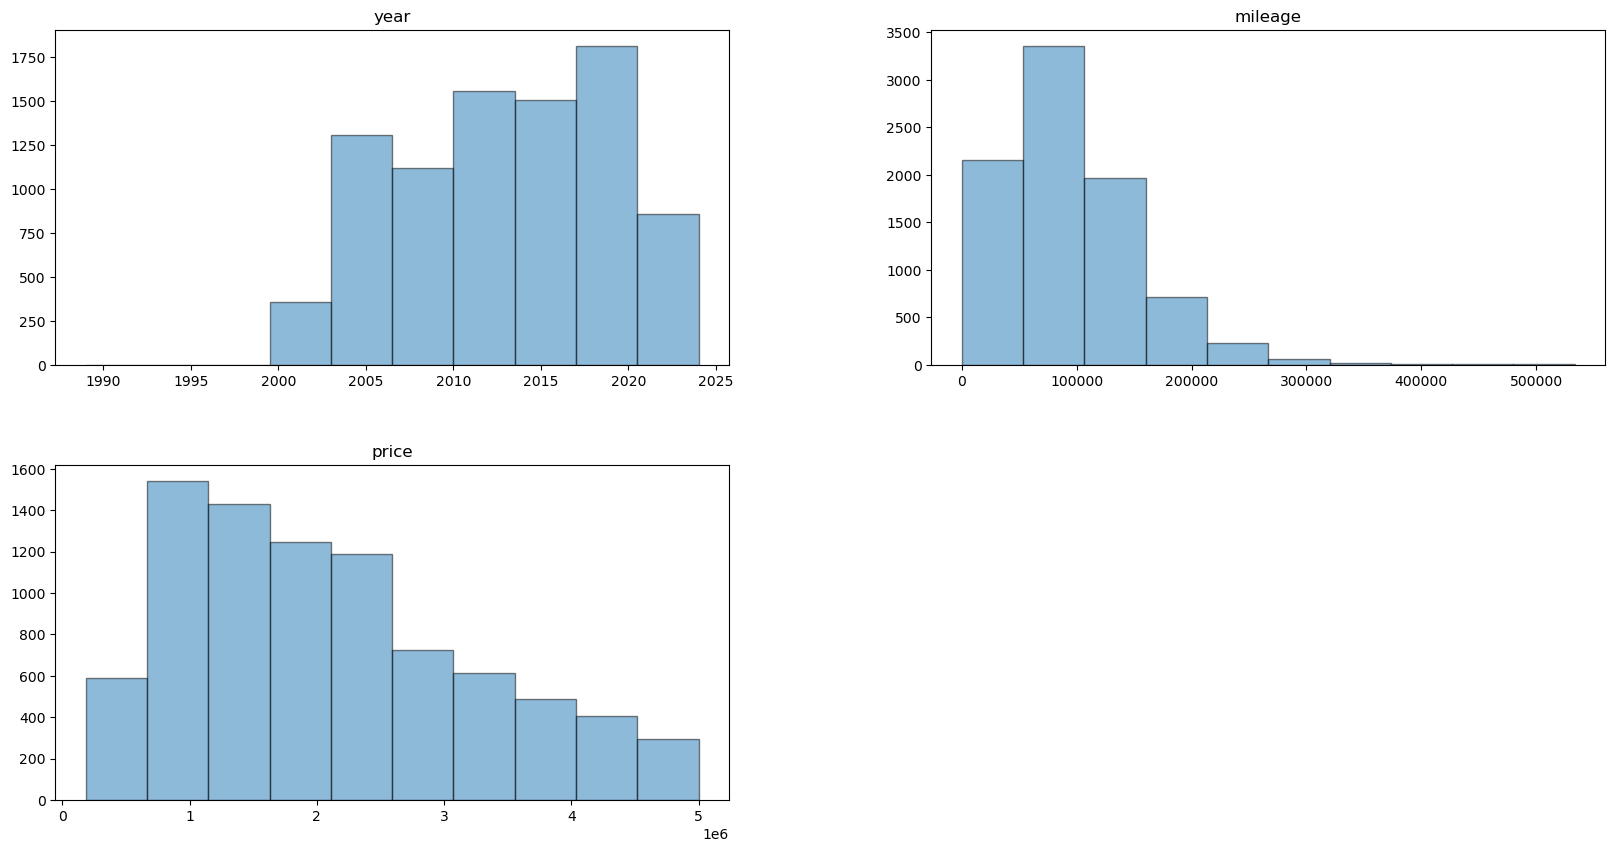

In [116]:
data_for_hist = data.select_dtypes(exclude = ['bool'])
data_for_hist.hist(figsize = (20, 10), alpha = 0.5, edgecolor = 'black', grid = False);

## Generate a box plot for `price`

In [117]:
data['price'].describe()

count      8524.000000
mean    2094285.326607
std     1155621.032335
min      185000.000000
25%     1148000.000000
50%     1900000.000000
75%     2800000.000000
max     5000000.000000
Name: price, dtype: float64

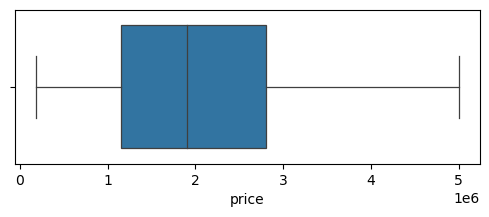

In [118]:
plt.figure(figsize = (6, 2))
sns.boxplot(x = data['price'], linewidth = 0.9);

## Generate bar charts for `brand`

In [119]:
brand_dist = data['brand'].value_counts(dropna = False)
brand_dist

Suzuki        2931
Honda         1724
Toyota        1560
Daihatsu      1373
Mitsubishi     249
KIA            234
Changan        192
FAW            137
Chevrolet       77
Mercedes        45
Hyundai          2
Name: brand, dtype: int64

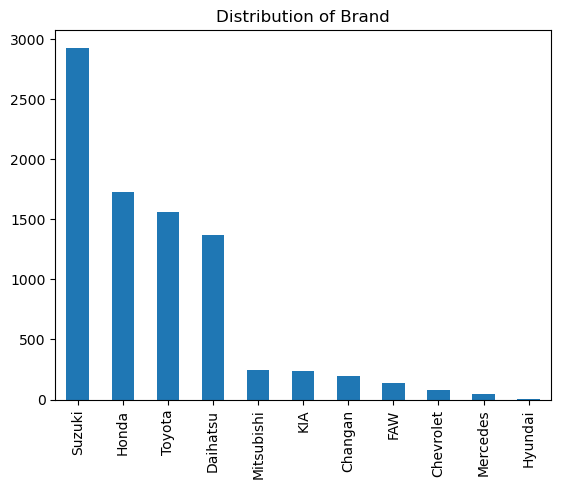

In [120]:
# Vertical bar chart.

brand_dist.plot(kind = 'bar')
plt.title('Distribution of Brand');

## Generate bar charts for `fuel_method`

In [121]:
fuel_method_dist = data['fuel_method'].value_counts(dropna = False)
fuel_method_dist

Petrol    8344
CNG        178
Diesel       1
Hybrid       1
Name: fuel_method, dtype: int64

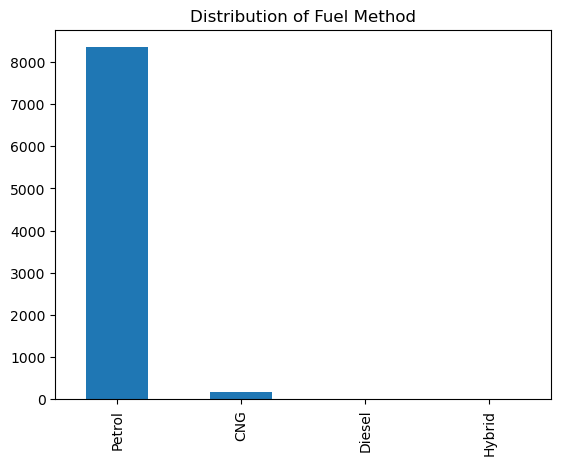

In [122]:
fuel_method_dist.plot(kind = 'bar')
plt.title('Distribution of Fuel Method');

## Generate bar charts for `registration_city`

In [123]:
registration_city_dist = data['registration_city'].value_counts(dropna=False)
pd.set_option('display.max_rows', None)  
print(registration_city_dist)
pd.reset_option('display.max_rows')

Lahore              3141
Karachi             2587
Islamabad           1199
Sindh                460
Punjab               343
Multan               147
Faisalabad           143
Rawalpindi           116
Unregistered         109
Sialkot               40
Peshawar              30
Gujranwala            29
Hyderabad             26
Bahawalpur            18
Sahiwal               18
Rahimyar Khan         16
Sargodha              10
Jhelum                 8
Gujrat                 7
Mirpur                 5
Mardan                 5
Dera Ghazi Khan        4
Abbottabad             4
Jhang Sadar            4
Khanewal               4
Unknown                3
Larkana                3
Kasur                  3
Attock                 3
Pirmahal               2
Wah                    2
Okara                  2
Sheikhüpura            2
Chiniot                2
Bannu                  2
Vehari                 2
Chishtian Mandi        1
Bahawalnagar           1
Charsadda              1
Swat                   1


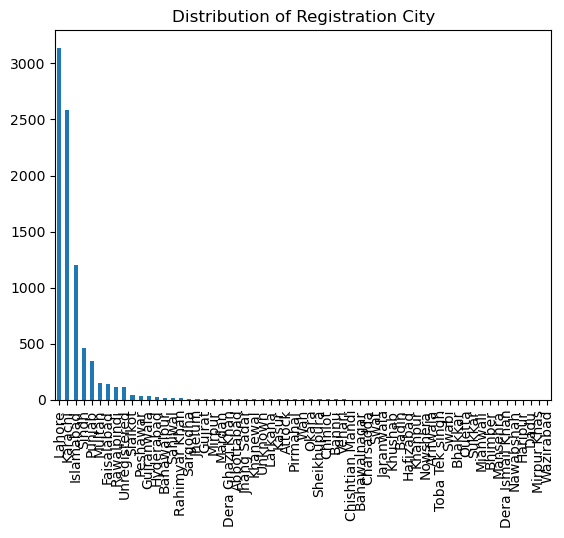

In [124]:
registration_city_dist.plot(kind = 'bar')
plt.title('Distribution of Registration City');

## Generate bar charts for `car_documents`

In [125]:
car_documents_dist = data['car_documents'].value_counts(dropna = False)
car_documents_dist

Original     8466
Duplicate      58
Name: car_documents, dtype: int64

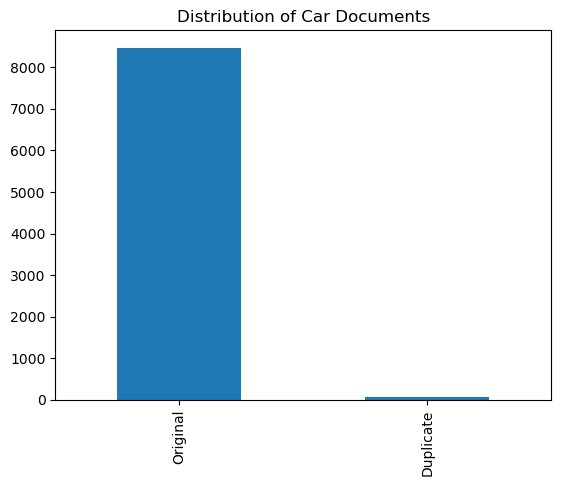

In [126]:
car_documents_dist.plot(kind = 'bar')
plt.title('Distribution of Car Documents');

## Generate bar charts for `assembly`

In [127]:
assembly_dist = data['assembly'].value_counts(dropna = False)
assembly_dist

Local       5582
Imported    2942
Name: assembly, dtype: int64

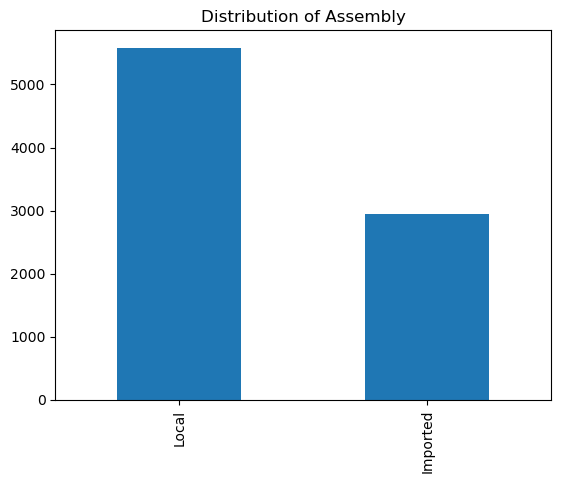

In [128]:
assembly_dist.plot(kind = 'bar')
plt.title('Distribution of Assembly');

## Generate bar charts for `transmission`

In [129]:
transmission_dist = data['transmission'].value_counts(dropna = False)
transmission_dist

Manual       5052
Automatic    3472
Name: transmission, dtype: int64

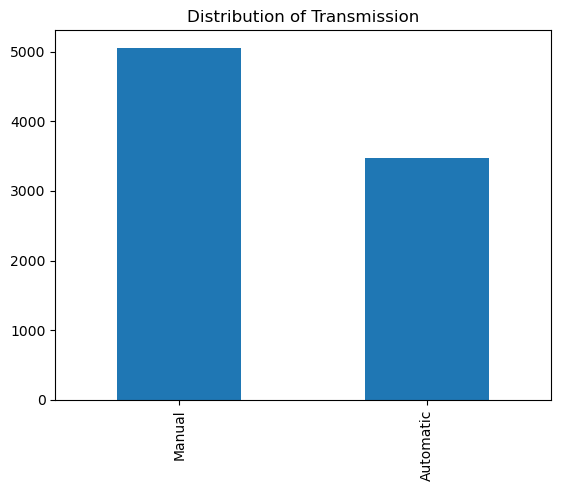

In [130]:
transmission_dist.plot(kind = 'bar')
plt.title('Distribution of Transmission');

## Mapping `brand` Column Values

In [131]:
mapping = {
    'Mitsubishi': 'Others',
    'KIA': 'Others',
    'Changan': 'Others',
    'FAW': 'Others',
    'Chevrolet': 'Others',
    'Mercedes': 'Others',
    'Hyundai': 'Others',
}

# Replace values based on the mapping dictionary
data['brand'].replace(mapping, inplace=True)

# Display the updated DataFrame
data.head()

,id,brand,year,mileage,price,fuel_method,registration_city,car_documents,assembly,transmission
0,1080434207,Others,2022,8500,4200000,Petrol,Lahore,Original,Local,Automatic
1,1080155972,Others,2022,2200,4100000,Petrol,Lahore,Original,Local,Automatic
2,1080646142,Others,2021,17000,3950000,Petrol,Punjab,Original,Local,Automatic
3,1080491687,Others,2022,15000,3785000,Petrol,Punjab,Original,Local,Manual
4,1080971973,Others,2022,27000,4075000,Petrol,Islamabad,Original,Local,Automatic


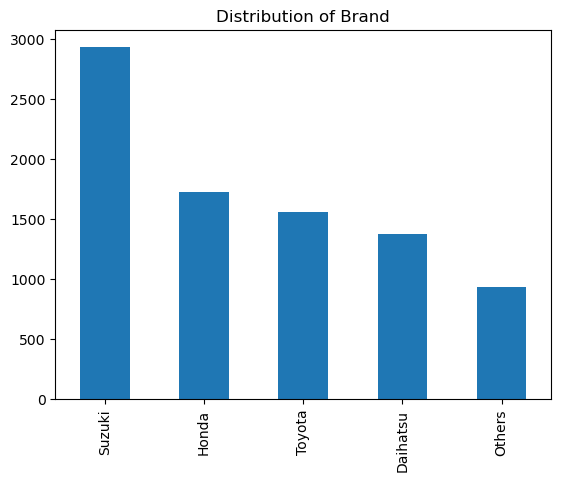

In [132]:
# Vertical bar chart.
brand_dist = data['brand'].value_counts(dropna = False)
brand_dist.plot(kind = 'bar')
plt.title('Distribution of Brand');

## Mapping `fuel_method` Column Values

In [133]:
mapping = {
    'CNG': 'Others',
    'Diesel': 'Others',
    'Hybrid': 'Others',
}

# Replace values based on the mapping dictionary
data['fuel_method'].replace(mapping, inplace=True)

# Display the updated DataFrame
data.head()

,id,brand,year,mileage,price,fuel_method,registration_city,car_documents,assembly,transmission
0,1080434207,Others,2022,8500,4200000,Petrol,Lahore,Original,Local,Automatic
1,1080155972,Others,2022,2200,4100000,Petrol,Lahore,Original,Local,Automatic
2,1080646142,Others,2021,17000,3950000,Petrol,Punjab,Original,Local,Automatic
3,1080491687,Others,2022,15000,3785000,Petrol,Punjab,Original,Local,Manual
4,1080971973,Others,2022,27000,4075000,Petrol,Islamabad,Original,Local,Automatic


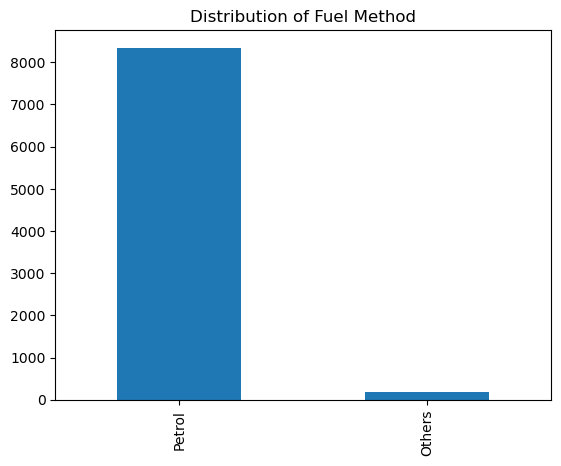

In [134]:
# Vertical bar chart.
fuel_method = data['fuel_method'].value_counts(dropna = False)
fuel_method.plot(kind = 'bar')
plt.title('Distribution of Fuel Method');

## Mapping `registration_city` Column Values

In [135]:
mapping = {
    'Punjab': 'Other City',
    'Multan': 'Other City',
    'Faisalabad': 'Other City',
    'Rawalpindi': 'Other City',
    'Unregistered': 'Other City',
    'Sialkot': 'Other City',    
    'Peshawar': 'Other City',
    'Gujranwala': 'Other City',
    'Hyderabad': 'Other City',
    'Bahawalpur': 'Other City',
    'Sahiwal': 'Other City',
    'Rahimyar Khan': 'Other City',
    'Sargodha': 'Other City',
    'Jhelum': 'Other City',
    'Gujrat': 'Other City',
    'Mirpur': 'Other City',
    'Mardan': 'Other City',
    'Dera Ghazi Khan': 'Other City',    
    'Abbottabad': 'Other City',
    'Jhang Sadar': 'Other City',
    'Khanewal': 'Other City',
    'Unknown': 'Other City',
    'Larkana': 'Other City',
    'Kasur': 'Other City',
    'Attock': 'Other City',
    'Pirmahal': 'Other City',
    'Wah': 'Other City',
    'Okara': 'Other City',
    'Sheikhüpura': 'Other City',
    'Chiniot': 'Other City',    
    'Bannu': 'Other City',
    'Vehari': 'Other City',
    'Chishtian Mandi': 'Other City',
    'Bahawalnagar': 'Other City',
    'Charsadda': 'Other City',
    'Swat': 'Other City',
    'Jaranwala': 'Other City',
    'Khushab': 'Other City',
    'Badin': 'Other City',
    'Hafizabad': 'Other City',
    'Khanpur': 'Other City',
    'Nowshera': 'Other City',    
    'Arifwala': 'Other City',
    'Toba Tek singh': 'Other City',
    'Swabi': 'Other City',
    'Quetta': 'Other City',
    'Sukkar': 'Other City',
    'Mianwali': 'Other City',
    'Bhimber': 'Other City',
    'Mansehra': 'Other City',    
    'Dera Ismail Khan': 'Other City',
    'Nawabshah': 'Other City',
    'Haripur': 'Other City',
    'Dadu': 'Other City',
    'Mirpur Khas': 'Other City',
    'Wazirabad': 'Other City',
    'Bhakkar': 'Other City'
}

# Replace values based on the mapping dictionary
data['registration_city'].replace(mapping, inplace=True)

# Display the updated DataFrame
data.head()

,id,brand,year,mileage,price,fuel_method,registration_city,car_documents,assembly,transmission
0,1080434207,Others,2022,8500,4200000,Petrol,Lahore,Original,Local,Automatic
1,1080155972,Others,2022,2200,4100000,Petrol,Lahore,Original,Local,Automatic
2,1080646142,Others,2021,17000,3950000,Petrol,Other City,Original,Local,Automatic
3,1080491687,Others,2022,15000,3785000,Petrol,Other City,Original,Local,Manual
4,1080971973,Others,2022,27000,4075000,Petrol,Islamabad,Original,Local,Automatic


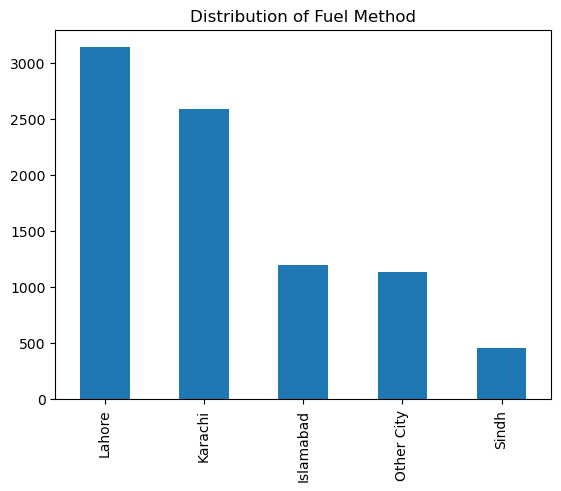

In [136]:
# Vertical bar chart.
registration_city = data['registration_city'].value_counts(dropna = False)
registration_city.plot(kind = 'bar')
plt.title('Distribution of Fuel Method');

## Check Updated Data Details

In [137]:
for column in data.columns:
    value_counts = data[column].value_counts()
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for id:
1080434207    1
1080413013    1
1079060019    1
1080273082    1
1077637008    1
             ..
1080504055    1
1080504119    1
1080504296    1
1080505694    1
1079037799    1
Name: id, Length: 8524, dtype: int64

Value counts for brand:
Suzuki      2931
Honda       1724
Toyota      1560
Daihatsu    1373
Others       936
Name: brand, dtype: int64

Value counts for year:
2018    574
2017    542
2015    529
2016    527
2007    489
2021    486
2014    452
2012    418
2006    418
2013    409
2005    402
2011    388
2019    372
2008    360
2010    344
2020    325
2022    315
2004    285
2009    271
2003    201
2002    138
2001    136
2000     86
2023     54
2024      1
1989      1
1993      1
Name: year, dtype: int64

Value counts for mileage:
100000    481
150000    227
123456    185
200000    170
12345     165
         ... 
1555        1
161500      1
15555       1
105700      1
55700       1
Name: mileage, Length: 1513, dtype: int64

Value counts for price:
2250000  

In [138]:
data

,id,brand,year,mileage,price,fuel_method,registration_city,car_documents,assembly,transmission
0,1080434207,Others,2022,8500,4200000,Petrol,Lahore,Original,Local,Automatic
1,1080155972,Others,2022,2200,4100000,Petrol,Lahore,Original,Local,Automatic
2,1080646142,Others,2021,17000,3950000,Petrol,Other City,Original,Local,Automatic
3,1080491687,Others,2022,15000,3785000,Petrol,Other City,Original,Local,Manual
4,1080971973,Others,2022,27000,4075000,Petrol,Islamabad,Original,Local,Automatic
...,...,...,...,...,...,...,...,...,...,...
8716,1078453186,Toyota,2020,54000,4500000,Petrol,Islamabad,Original,Local,Automatic
8717,1071092728,Toyota,2021,18500,4050000,Petrol,Other City,Original,Local,Manual
8718,1075869467,Toyota,2022,12000,4700000,Petrol,Other City,Original,Local,Automatic
8719,1079723349,Toyota,2020,55000,3900000,Petrol,Karachi,Original,Local,Automatic


In [139]:
data.shape

(8524, 10)

# Data Preprocessing

## Identify categorical features

In [140]:
categorical_columns = list(data.select_dtypes(['object']).columns)

print('The number of categorical features:',
      len(categorical_columns))
print('The names of categorical features:',
      categorical_columns)

The number of categorical features: 7
The names of categorical features: ['id', 'brand', 'fuel_method', 'registration_city', 'car_documents', 'assembly', 'transmission']


## One-hot encoding for all categorical features

In [141]:
cols = ['brand', 'fuel_method', 'registration_city', 'car_documents', 'assembly', 'transmission']

encoder = ce.OneHotEncoder(cols = cols,
                           return_df = True,
                           use_cat_names = True)

In [142]:
# Fit and transform data.

data_encoded = encoder.fit_transform(data)

# Preview the data.

data_encoded.head()

,id,brand_Others,brand_Daihatsu,brand_Honda,brand_Suzuki,brand_Toyota,year,mileage,price,fuel_method_Petrol,fuel_method_Others,registration_city_Lahore,registration_city_Other City,registration_city_Islamabad,registration_city_Karachi,registration_city_Sindh,car_documents_Original,car_documents_Duplicate,assembly_Local,assembly_Imported,transmission_Automatic,transmission_Manual
0,1080434207,1,0,0,0,0,2022,8500,4200000,1,0,1,0,0,0,0,1,0,1,0,1,0
1,1080155972,1,0,0,0,0,2022,2200,4100000,1,0,1,0,0,0,0,1,0,1,0,1,0
2,1080646142,1,0,0,0,0,2021,17000,3950000,1,0,0,1,0,0,0,1,0,1,0,1,0
3,1080491687,1,0,0,0,0,2022,15000,3785000,1,0,0,1,0,0,0,1,0,1,0,0,1
4,1080971973,1,0,0,0,0,2022,27000,4075000,1,0,0,0,1,0,0,1,0,1,0,1,0


## Discretize `year` into bins

In [143]:
data_encoded.year.describe()

count   8524.000000
mean    2012.628930
std        5.911162
min     1989.000000
25%     2007.000000
50%     2013.000000
75%     2017.000000
max     2024.000000
Name: year, dtype: float64

In [144]:
# Define age bins and labels.

bins = [1989, 1996, 2003, 2010, 2017, 2025]
labels = ['1989–1995', '1996–2002', '2003-2009',
          '2010-2016', '2017-2024']

# Perform binning using bin list.

data_encoded['year_group'] = pd.cut(data_encoded['year'], bins = bins, labels = labels, right = False)

# Map bins to integer values.
data_encoded['year_group_encoded'] = data_encoded['year_group'].cat.codes

In [145]:
year_vars = ['year_group_encoded', 'year_group', 'year']

data_encoded[year_vars].sample(10)

,year_group_encoded,year_group,year
1882,4,2017-2024,2020
5455,1,1996–2002,2001
5166,4,2017-2024,2018
2344,3,2010-2016,2011
6307,3,2010-2016,2014
3339,3,2010-2016,2015
2103,2,2003-2009,2005
7766,0,1989–1995,1993
4827,2,2003-2009,2006
473,2,2003-2009,2003


 ## Plot the new distribution of `year`

In [146]:
year_dist = data_encoded.year_group.value_counts()

year_dist

2010-2016    3067
2017-2024    2669
2003-2009    2426
1996–2002     360
1989–1995       2
Name: year_group, dtype: int64

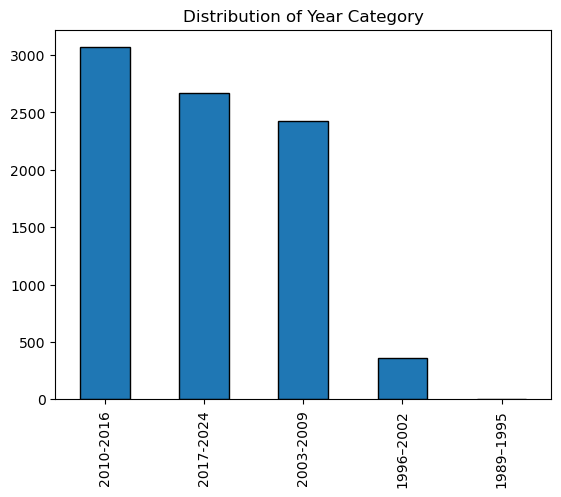

In [147]:
year_dist.plot(kind = 'bar', edgecolor = 'black')
plt.title('Distribution of Year Category');

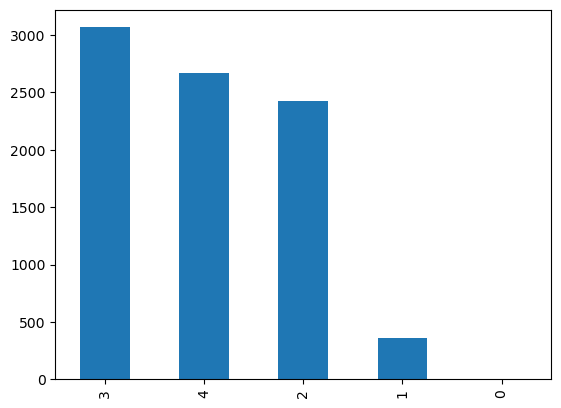

In [148]:
# Check against encoded values.
data_encoded.year_group_encoded.value_counts().plot(kind = 'bar');

## Drop the `year` and `year_group` variables

In [149]:
data_encoded.drop(['year', 'year_group'], axis = 1, inplace = True)

list(data_encoded)

['id',
 'brand_Others',
 'brand_Daihatsu',
 'brand_Honda',
 'brand_Suzuki',
 'brand_Toyota',
 'mileage',
 'price',
 'fuel_method_Petrol',
 'fuel_method_Others',
 'registration_city_Lahore',
 'registration_city_Other City',
 'registration_city_Islamabad',
 'registration_city_Karachi',
 'registration_city_Sindh',
 'car_documents_Original',
 'car_documents_Duplicate',
 'assembly_Local',
 'assembly_Imported',
 'transmission_Automatic',
 'transmission_Manual',
 'year_group_encoded']

In [150]:
data_encoded.head(5)

,id,brand_Others,brand_Daihatsu,brand_Honda,brand_Suzuki,brand_Toyota,mileage,price,fuel_method_Petrol,fuel_method_Others,registration_city_Lahore,registration_city_Other City,registration_city_Islamabad,registration_city_Karachi,registration_city_Sindh,car_documents_Original,car_documents_Duplicate,assembly_Local,assembly_Imported,transmission_Automatic,transmission_Manual,year_group_encoded
0,1080434207,1,0,0,0,0,8500,4200000,1,0,1,0,0,0,0,1,0,1,0,1,0,4
1,1080155972,1,0,0,0,0,2200,4100000,1,0,1,0,0,0,0,1,0,1,0,1,0,4
2,1080646142,1,0,0,0,0,17000,3950000,1,0,0,1,0,0,0,1,0,1,0,1,0,4
3,1080491687,1,0,0,0,0,15000,3785000,1,0,0,1,0,0,0,1,0,1,0,0,1,4
4,1080971973,1,0,0,0,0,27000,4075000,1,0,0,0,1,0,0,1,0,1,0,1,0,4


## Discretize `mileage` into bins

In [151]:
data_encoded.mileage.describe()

count     8524.000000
mean     95753.231933
std      61635.315995
min          1.000000
25%      52839.000000
50%      90000.000000
75%     125000.000000
max     533528.000000
Name: mileage, dtype: float64

In [152]:
# Define age bins and labels.

bins = [1, 100000, 300000, 555000]
labels = ['1–99999', '100000–299999', '300000-555000']

# Perform binning using bin list.

data_encoded['mileage_group'] = pd.cut(data_encoded['mileage'], bins = bins, labels = labels, right = False)

# Map bins to integer values.
data_encoded['mileage_group_encoded'] = data_encoded['mileage_group'].cat.codes

In [153]:
year_vars = ['mileage_group_encoded', 'mileage_group', 'mileage']

data_encoded[year_vars].sample(10)

,mileage_group_encoded,mileage_group,mileage
764,1,100000–299999,135000
2478,0,1–99999,84000
44,0,1–99999,39000
3972,1,100000–299999,150000
2129,1,100000–299999,123456
7596,0,1–99999,47000
1838,1,100000–299999,149998
5370,0,1–99999,12435
3394,0,1–99999,95000
2069,0,1–99999,98000


## Plot the new distribution of `mileage`

In [154]:
mileage_dist = data_encoded.mileage_group.value_counts()

mileage_dist

1–99999          4845
100000–299999    3605
300000-555000      74
Name: mileage_group, dtype: int64

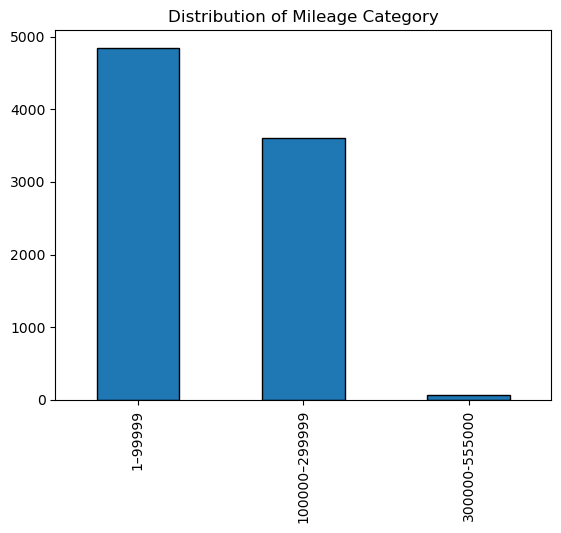

In [155]:
mileage_dist.plot(kind = 'bar', edgecolor = 'black')
plt.title('Distribution of Mileage Category');

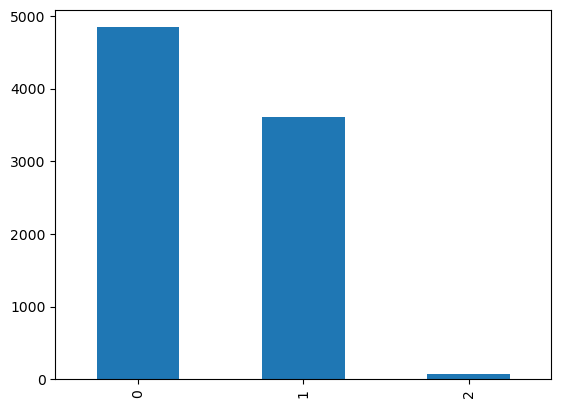

In [156]:
# Check against encoded values.
data_encoded.mileage_group_encoded.value_counts().plot(kind = 'bar');

## Drop the `mileage` and `mileage_group` variables

In [157]:
data_encoded.drop(['mileage', 'mileage_group'], axis = 1, inplace = True)

list(data_encoded)

['id',
 'brand_Others',
 'brand_Daihatsu',
 'brand_Honda',
 'brand_Suzuki',
 'brand_Toyota',
 'price',
 'fuel_method_Petrol',
 'fuel_method_Others',
 'registration_city_Lahore',
 'registration_city_Other City',
 'registration_city_Islamabad',
 'registration_city_Karachi',
 'registration_city_Sindh',
 'car_documents_Original',
 'car_documents_Duplicate',
 'assembly_Local',
 'assembly_Imported',
 'transmission_Automatic',
 'transmission_Manual',
 'year_group_encoded',
 'mileage_group_encoded']

In [158]:
data_encoded.head(5)

,id,brand_Others,brand_Daihatsu,brand_Honda,brand_Suzuki,brand_Toyota,price,fuel_method_Petrol,fuel_method_Others,registration_city_Lahore,registration_city_Other City,registration_city_Islamabad,registration_city_Karachi,registration_city_Sindh,car_documents_Original,car_documents_Duplicate,assembly_Local,assembly_Imported,transmission_Automatic,transmission_Manual,year_group_encoded,mileage_group_encoded
0,1080434207,1,0,0,0,0,4200000,1,0,1,0,0,0,0,1,0,1,0,1,0,4,0
1,1080155972,1,0,0,0,0,4100000,1,0,1,0,0,0,0,1,0,1,0,1,0,4,0
2,1080646142,1,0,0,0,0,3950000,1,0,0,1,0,0,0,1,0,1,0,1,0,4,0
3,1080491687,1,0,0,0,0,3785000,1,0,0,1,0,0,0,1,0,1,0,0,1,4,0
4,1080971973,1,0,0,0,0,4075000,1,0,0,0,1,0,0,1,0,1,0,1,0,4,0


## Remove date column

In [159]:
drop_col = ['id']
data_final = data_encoded.drop(drop_col, axis=1)

In [160]:
data_final.head(5)

,brand_Others,brand_Daihatsu,brand_Honda,brand_Suzuki,brand_Toyota,price,fuel_method_Petrol,fuel_method_Others,registration_city_Lahore,registration_city_Other City,registration_city_Islamabad,registration_city_Karachi,registration_city_Sindh,car_documents_Original,car_documents_Duplicate,assembly_Local,assembly_Imported,transmission_Automatic,transmission_Manual,year_group_encoded,mileage_group_encoded
0,1,0,0,0,0,4200000,1,0,1,0,0,0,0,1,0,1,0,1,0,4,0
1,1,0,0,0,0,4100000,1,0,1,0,0,0,0,1,0,1,0,1,0,4,0
2,1,0,0,0,0,3950000,1,0,0,1,0,0,0,1,0,1,0,1,0,4,0
3,1,0,0,0,0,3785000,1,0,0,1,0,0,0,1,0,1,0,0,1,4,0
4,1,0,0,0,0,4075000,1,0,0,0,1,0,0,1,0,1,0,1,0,4,0


# Target Variable Exploration and Data Splitting

## Explore the distribution of the target variable

In [161]:
pd.set_option('display.float_format', '{:.6f}'.format)
data_final['price'].describe()

count      8524.000000
mean    2094285.326607
std     1155621.032335
min      185000.000000
25%     1148000.000000
50%     1900000.000000
75%     2800000.000000
max     5000000.000000
Name: price, dtype: float64

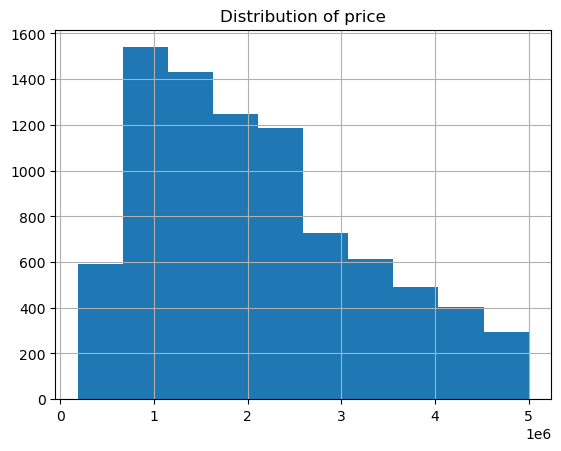

In [162]:
data_final['price'].hist()
plt.title('Distribution of price');

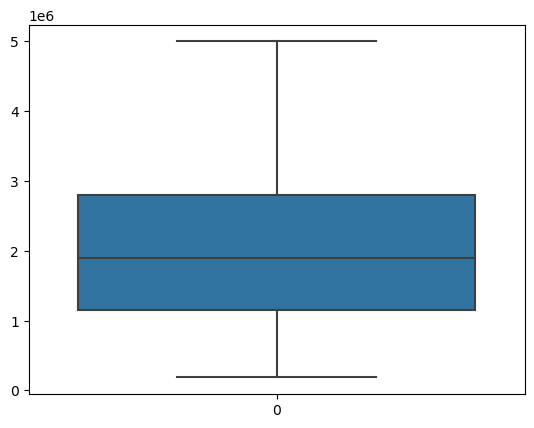

In [163]:
sns.boxplot(data_final['price']);

## Identify the outliers

In [164]:
q1 = np.percentile(data_final['price'], 25)
q3 = np.percentile(data_final['price'], 75)
iqr = q3 - q1

lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr

print('Lower bound:', round(lb, 2))
print('Upper bound:', round(ub, 2))

Lower bound: -1330000.0
Upper bound: 5278000.0


In [165]:
print('Number of users with price greater than UB:',
      data_final[(data_final['price'] >= ub)].shape[0])
print('Number of users with price lower than LB:  ',
      data_final[(data_final['price'] <= lb)].shape[0])

Number of users with price greater than UB: 0
Number of users with price lower than LB:   0


## Split the data into target and features

In [166]:
target_data = data_final['price'] 

features = data_final.drop(['price'], axis = 1)

In [167]:
target_data.head()

0    4200000
1    4100000
2    3950000
3    3785000
4    4075000
Name: price, dtype: int64

In [168]:
features.head()

,brand_Others,brand_Daihatsu,brand_Honda,brand_Suzuki,brand_Toyota,fuel_method_Petrol,fuel_method_Others,registration_city_Lahore,registration_city_Other City,registration_city_Islamabad,registration_city_Karachi,registration_city_Sindh,car_documents_Original,car_documents_Duplicate,assembly_Local,assembly_Imported,transmission_Automatic,transmission_Manual,year_group_encoded,mileage_group_encoded
0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,4,0
1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,4,0
2,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,4,0
3,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,4,0
4,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,4,0


## Split the data into train and test sets

In [169]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming you have already defined 'features' (X) and 'target_data' (y)
x = features
y = target_data

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create a Linear Regression model
linear_reg = LinearRegression()

# Define hyperparameter grid for GridSearchCV
param_grid = {'fit_intercept': [True, False]}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(linear_reg, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train_scaled, y_train)
best_model = grid_search.best_estimator_

# Train the best model on the entire training set
best_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_model.predict(x_test_scaled)

# Evaluate on the test set
test_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set: {}".format(test_mse))

# Cross-validation with the best model
cv_scores = cross_val_score(best_model, x_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
cv_scores = -cv_scores  # Take the negative of the scores
cv_scores_normalized = cv_scores / np.max(cv_scores)  # Normalize to the range [0, 1]
print("Cross-Validation Scores: {}".format(cv_scores_normalized))
print("Average Cross-Validation Score: {}".format(np.mean(cv_scores_normalized)))


Mean Squared Error on Test Set: 318244935814.8053
Cross-Validation Scores: [0.88287285 0.84930762 0.9879611  0.94358818 0.92134499 0.85423714
 0.80482885 1.         0.87551022 0.97919199]
Average Cross-Validation Score: 0.909884292980277


In [170]:
print('Training data features: ', x_train.shape)
print('Training data target:   ', y_train.shape)

Training data features:  (6819, 20)
Training data target:    (6819,)


## Check the distribution of the test data

In [171]:
print('Test data features: ', x_test.shape)
print('Test data target:   ', y_test.shape)

Test data features:  (1705, 20)
Test data target:    (1705,)


In [172]:
y_test.describe()

count      1705.000000
mean    2093070.377126
std     1171114.379504
min      185000.000000
25%     1100000.000000
50%     1890000.000000
75%     2800000.000000
max     5000000.000000
Name: price, dtype: float64

# Model Training (Regression Analysis)

## Train a linear regression model

In [173]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

## Make predictions using the linear regression model

In [174]:
linreg_y_pred = linreg.predict(x_test) 

In [175]:
results = pd.concat([y_test.iloc[:100], x_test.iloc[:100]], axis = 1)
results.insert(1, 'total_pred', linreg_y_pred[:100].round(2))
results

,price,total_pred,brand_Others,brand_Daihatsu,brand_Honda,brand_Suzuki,brand_Toyota,fuel_method_Petrol,fuel_method_Others,registration_city_Lahore,registration_city_Other City,registration_city_Islamabad,registration_city_Karachi,registration_city_Sindh,car_documents_Original,car_documents_Duplicate,assembly_Local,assembly_Imported,transmission_Automatic,transmission_Manual,year_group_encoded,mileage_group_encoded
7656,1650000,1855455.580000,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,2,1
2991,2900000,2521435.480000,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,3,1
7184,4900000,3932981.580000,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0,4,0
1084,1640000,1866258.410000,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,3,1
856,1550000,2018724.790000,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2250000,1866258.410000,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,3,1
766,850000,863252.030000,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,2,0
2246,950000,944674.780000,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,1
2441,3200000,2403919.820000,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,3,1


## Obtain the linear regression model's score

In [176]:
r2_score(y_test, linreg_y_pred)

0.7681666603600815

## Train a decision tree model

In [177]:
reg_tree = DecisionTreeRegressor()
reg_tree.fit(x_train, y_train)

DecisionTreeRegressor()

## Make predictions using the decision tree model

In [178]:
reg_tree_y_pred = reg_tree.predict(x_test)

In [179]:
results['total_pred'] = reg_tree_y_pred[:100]
results

,price,total_pred,brand_Others,brand_Daihatsu,brand_Honda,brand_Suzuki,brand_Toyota,fuel_method_Petrol,fuel_method_Others,registration_city_Lahore,registration_city_Other City,registration_city_Islamabad,registration_city_Karachi,registration_city_Sindh,car_documents_Original,car_documents_Duplicate,assembly_Local,assembly_Imported,transmission_Automatic,transmission_Manual,year_group_encoded,mileage_group_encoded
7656,1650000,1739411.764706,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,2,1
2991,2900000,2735000.000000,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,3,1
7184,4900000,3848235.294118,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0,4,0
1084,1640000,1859131.578947,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,3,1
856,1550000,1976803.278689,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2250000,1859131.578947,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,3,1
766,850000,852500.000000,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,2,0
2246,950000,1450000.000000,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,1
2441,3200000,2638733.734940,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,3,1


In [180]:
r2_score(y_test, reg_tree_y_pred)

0.8310652392889336

## Visualize the decision tree

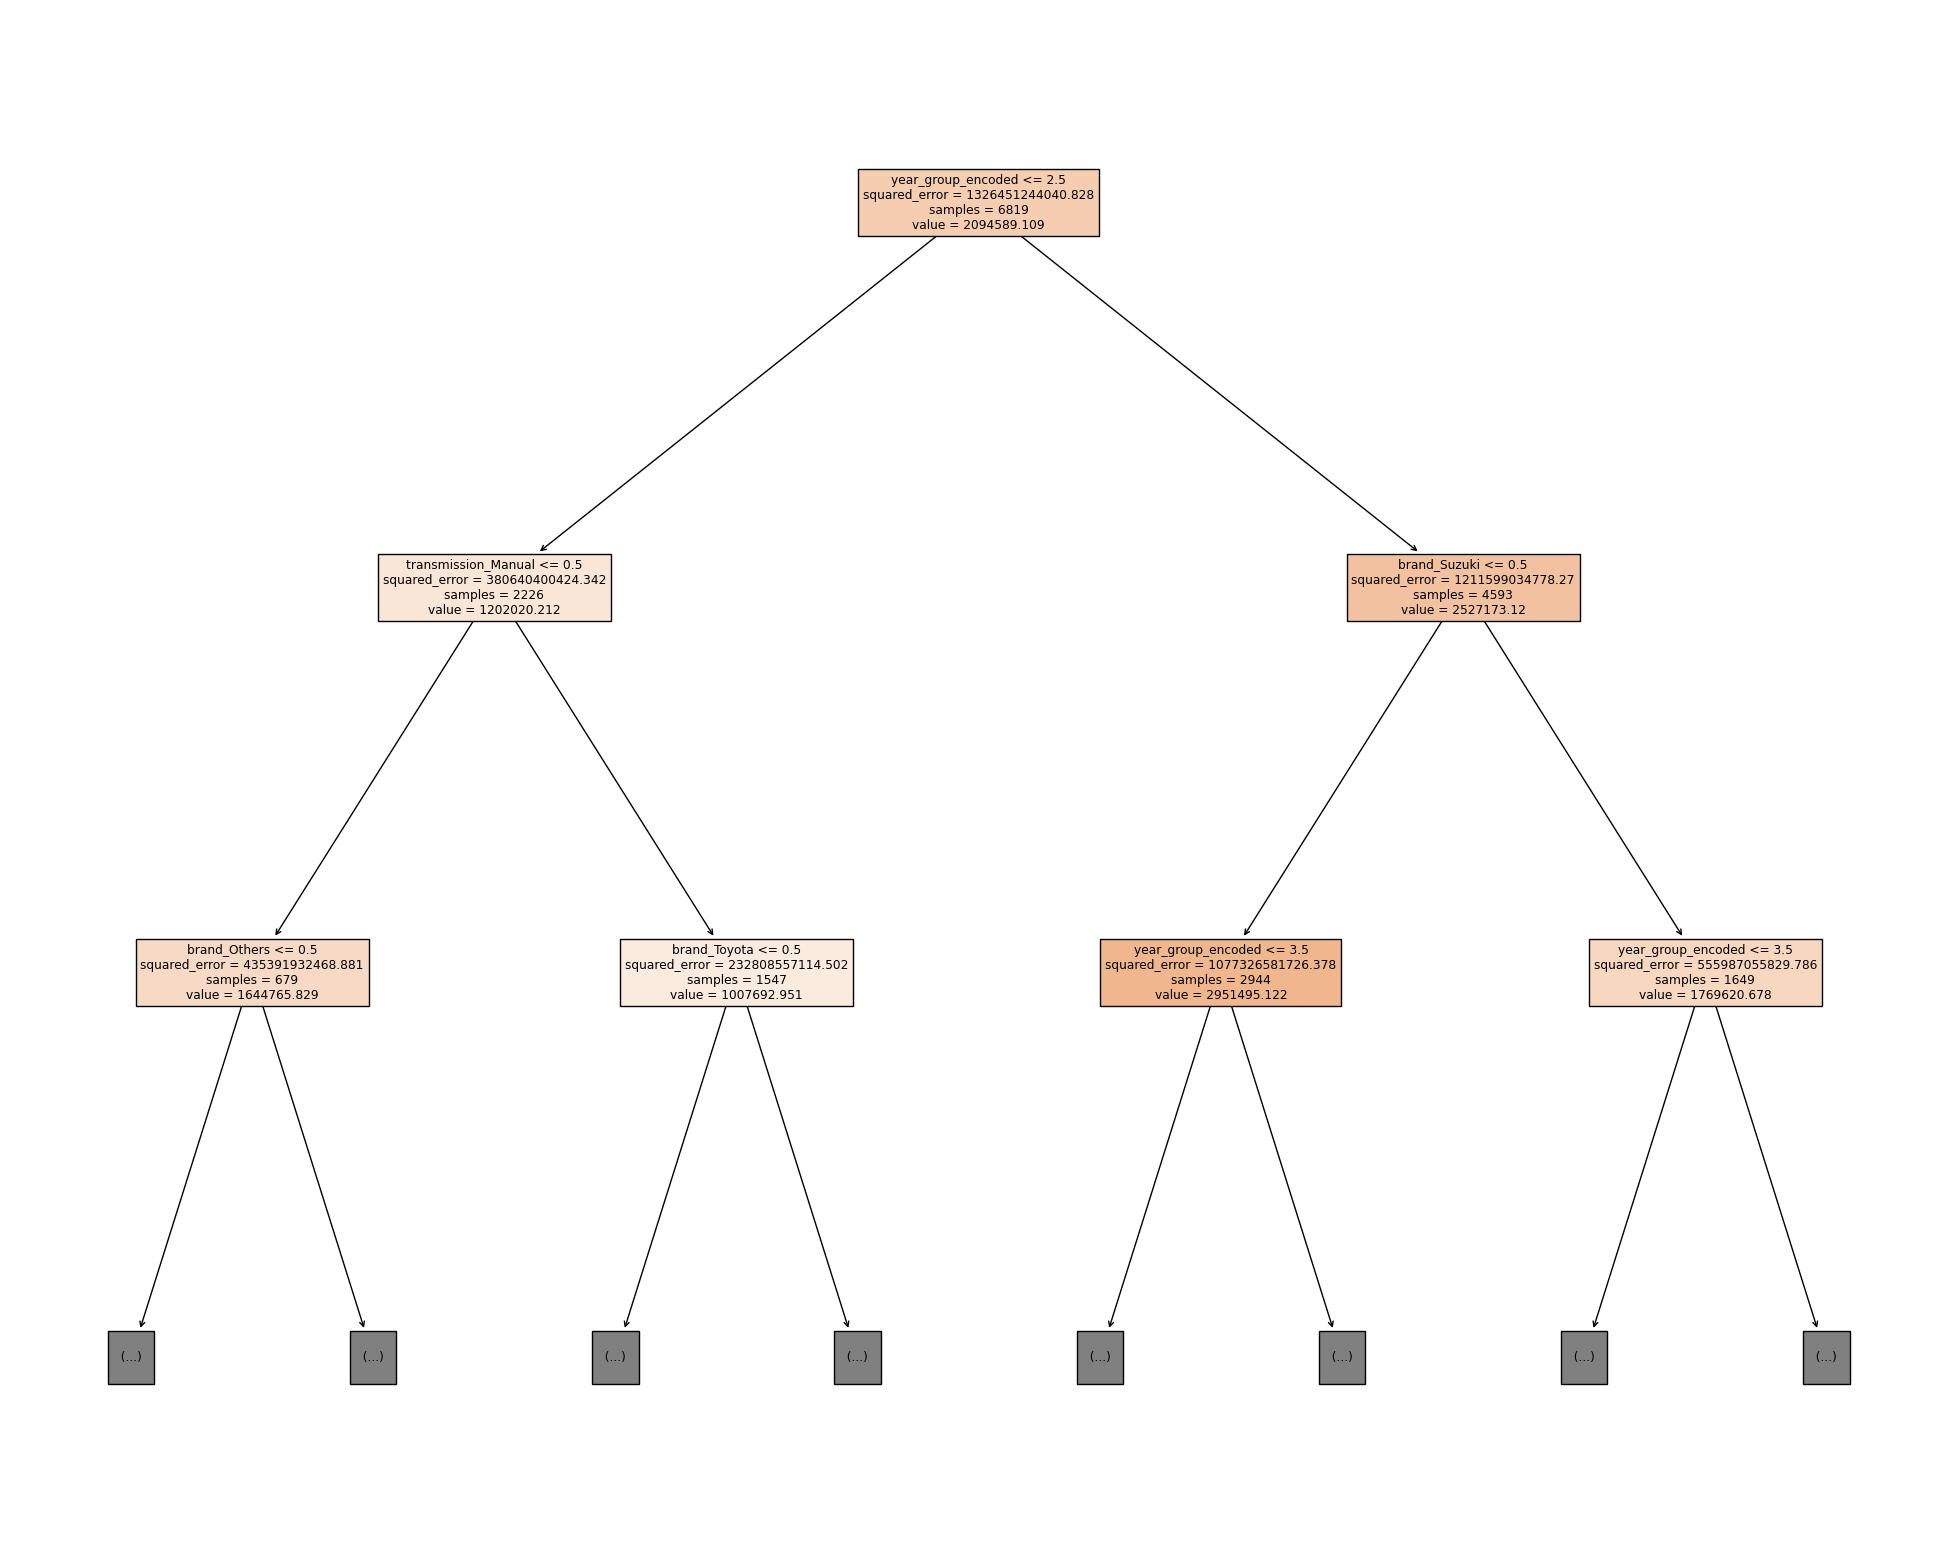

In [181]:
fig = plt.figure(figsize = (25, 20))
_ = tree.plot_tree(reg_tree, 
                   feature_names = list(x_train.columns),
                   max_depth = 2,
                   filled = True)

## Train a random forest model

In [182]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

## Make predictions using the random forest model

In [183]:
rf_y_pred = rf.predict(x_test)

In [184]:
results['total_pred'] = rf_y_pred[:100]
results

,price,total_pred,brand_Others,brand_Daihatsu,brand_Honda,brand_Suzuki,brand_Toyota,fuel_method_Petrol,fuel_method_Others,registration_city_Lahore,registration_city_Other City,registration_city_Islamabad,registration_city_Karachi,registration_city_Sindh,car_documents_Original,car_documents_Duplicate,assembly_Local,assembly_Imported,transmission_Automatic,transmission_Manual,year_group_encoded,mileage_group_encoded
7656,1650000,1724927.142924,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,2,1
2991,2900000,2764152.380952,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,3,1
7184,4900000,3850052.033057,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0,4,0
1084,1640000,1857831.699439,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,3,1
856,1550000,1978192.228975,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2250000,1857831.699439,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,3,1
766,850000,853620.407509,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,2,0
2246,950000,1266889.166667,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,1
2441,3200000,2640347.902375,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,3,1


## Obtain the random forest model's score

In [185]:
r2_score(y_test, rf_y_pred)

0.8364397156534522

## Train a gradient boosting model

In [186]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Make predictions using the gradient boosting model

In [187]:
xgb_y_pred = xgb.predict(x_test)

In [188]:
results['total_pred'] = xgb_y_pred[:100]
results

,price,total_pred,brand_Others,brand_Daihatsu,brand_Honda,brand_Suzuki,brand_Toyota,fuel_method_Petrol,fuel_method_Others,registration_city_Lahore,registration_city_Other City,registration_city_Islamabad,registration_city_Karachi,registration_city_Sindh,car_documents_Original,car_documents_Duplicate,assembly_Local,assembly_Imported,transmission_Automatic,transmission_Manual,year_group_encoded,mileage_group_encoded
7656,1650000,1746350.375000,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,2,1
2991,2900000,2731240.250000,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,3,1
7184,4900000,3842591.750000,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0,4,0
1084,1640000,1855230.250000,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,3,1
856,1550000,1981505.875000,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2250000,1855230.250000,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,3,1
766,850000,853255.500000,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,2,0
2246,950000,1293535.375000,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,1
2441,3200000,2651856.250000,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,3,1


## Obtain the gradient boosting model's score

In [189]:
r2_score(y_test, xgb_y_pred)

0.8381578005144462

## Compare evaluation metrics for each model

In [190]:
models = ['Linear Regression', 'Decision Tree',
          'Random Forest', 'XGBoost']

metrics = ['R2', 'MAE', 'MSE']

pred_list = ['linreg_y_pred', 'reg_tree_y_pred',
             'rf_y_pred', 'xgb_y_pred']

# Baseline algorithm.
dummy = DummyRegressor()
dummy.fit(x_train, y_train)
dummy_y_pred = dummy.predict(x_test)

scores = np.empty((0, 3))

for i in pred_list:
    scores = np.append(scores,
                       np.array([[r2_score(y_test, globals()[i]),
                                  mean_absolute_error(y_test, globals()[i]),
                                  mean_squared_error(y_test, globals()[i])]]),
                       axis = 0)

scores = np.around(scores, 4)

scoring_df = pd.DataFrame(scores, index = models, columns = metrics)
scoring_df.sort_values(by = 'MSE', ascending = True)

,R2,MAE,MSE
XGBoost,0.838200,355238.121100,221837828833.064911
Random Forest,0.836400,356749.092500,224192815459.083191
Decision Tree,0.831100,359515.281900,231559634320.970093
Linear Regression,0.768200,444393.327100,317774998611.710571


## Plot the residuals

In [191]:
# Set up DataFrame for plotting.
resid_df = pd.DataFrame()
resid_df['price'] = y_test
resid_df['total_pred'] = xgb_y_pred
resid_df['residuals'] = resid_df['price'] - resid_df['total_pred']
resid_df = resid_df.sort_values('price')[::20]
resid_df['record_num'] = np.arange(len(resid_df))

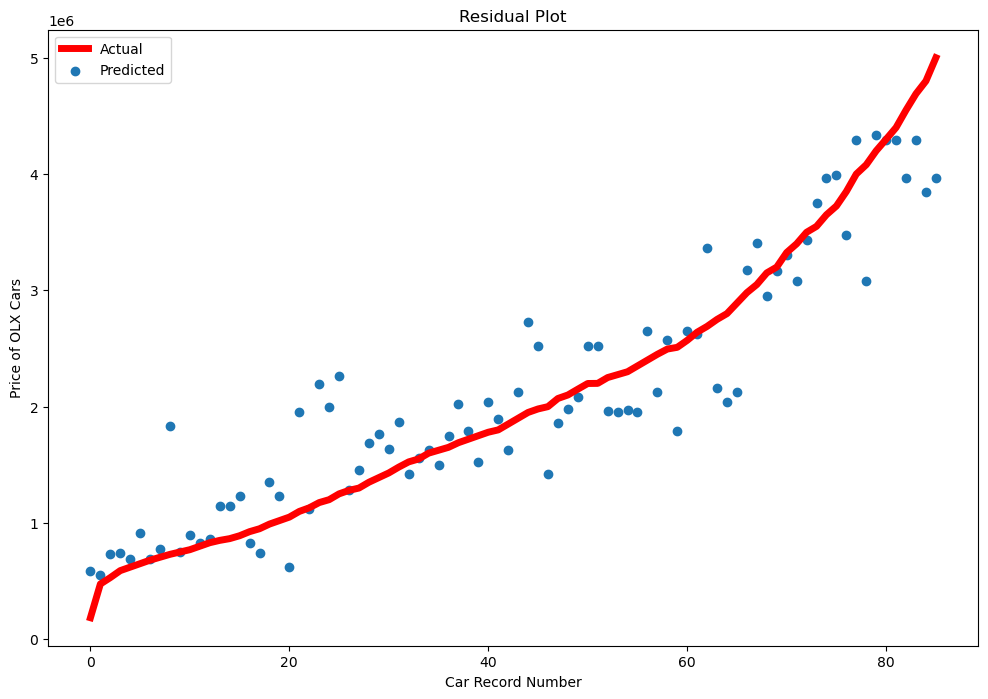

In [192]:
plt.figure(figsize = (12, 8))

plt.plot(resid_df['record_num'], resid_df['price'],
         color = 'red', linewidth = 5)
plt.scatter(resid_df['record_num'], resid_df['total_pred'])

plt.legend(['Actual', 'Predicted'])
plt.title('Residual Plot')
plt.ylabel('Price of OLX Cars')
plt.xlabel('Car Record Number')
plt.show();

## Generate a feature importance plot

In [193]:
def feature_importance_plot(model, x_train, n):
    """Plots feature importance. Only works for ensemble learning."""
    plt.figure(figsize = (8, 5))
    feat_importances = pd.Series(model.feature_importances_,
                                 index = x_train.columns)
    feat_importances.nlargest(n).plot(kind = 'bar')
    plt.title(f'Top {n} Features')
    plt.show()

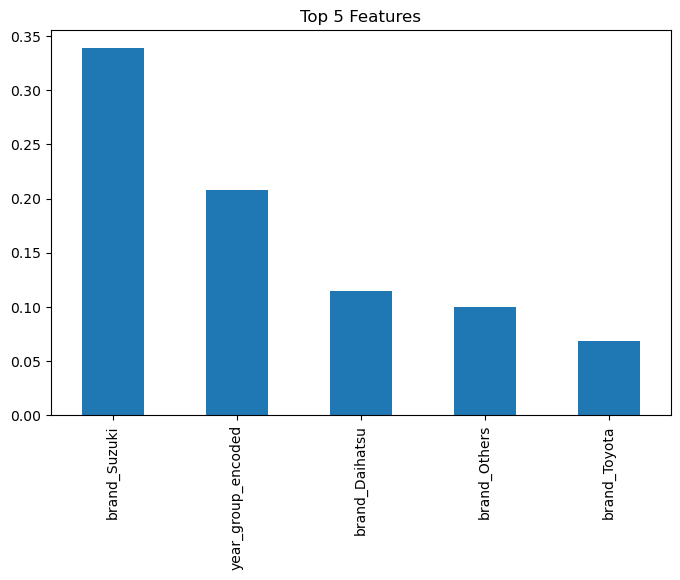

In [194]:
feature_importance_plot(xgb, x_train, 5)

In [195]:
def plot_learning_curves(model, x_train, y_train):
    """Plots learning curves for model validation."""
    plt.figure(figsize = (5, 5))
    train_sizes, train_scores, test_scores = \
    learning_curve(model, x_train, y_train, cv = 5,
                   scoring = 'neg_mean_squared_error',
                   n_jobs = -1,
                   shuffle = True,
                   train_sizes = np.linspace(0.01, 1.0, 5))
        
    # Means of training and test set scores.
    train_mean = np.mean(train_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)

    # Draw lines.
    plt.plot(train_sizes, train_mean, '--',
             color = '#111111', label = 'Training score')
    plt.plot(train_sizes, test_mean,
             color = '#111111', label = 'Cross-validation score')

    # Create plot.
    plt.title('Learning Curves')
    plt.xlabel('Training Set Size')
    plt.ylabel('Negative MSE')
    plt.legend(loc = 'best')
    plt.tight_layout()

    plt.show()

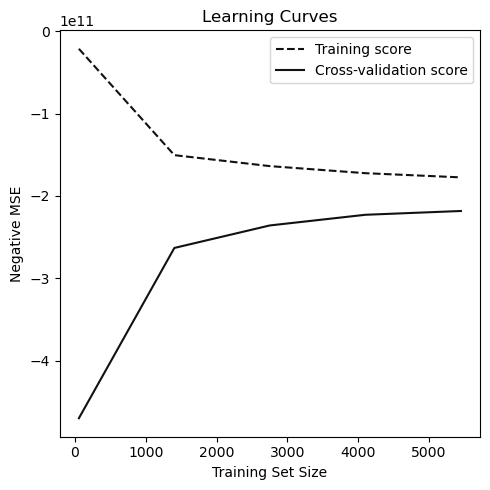

In [196]:
plot_learning_curves(xgb, x_train, y_train)

# Conclusion

After made following data science processes, XGBoost Algorithm is the best model with R2 = 0.838200, MAE = 355238.121100, and	MSE = 221837828833.064911. 
